<a href="https://colab.research.google.com/github/sametaydn/ECG-Heartbeat-Categorization/blob/main/ECGHeartbeatCategorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import os
from os import environ

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!ls

gdrive	sample_data


In [13]:
environ['KAGGLE_CONFIG_DIR'] ="/content/gdrive/MyDrive/Colab Notebooks/input"

In [14]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/input"

/content/gdrive/MyDrive/Colab Notebooks/input


In [15]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/input


In [18]:
!kaggle datasets download -d shayanfazeli/heartbeat

heartbeat.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
!ls

heartbeat.zip  kaggle.json


In [20]:
!unzip \*zip && rm *.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [21]:
!ls

kaggle.json	 mitbih_train.csv    ptbdb_normal.csv
mitbih_test.csv  ptbdb_abnormal.csv


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [24]:
train_df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/input/mitbih_train.csv',header=None)
test_df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/input/mitbih_test.csv',header=None)

In [25]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


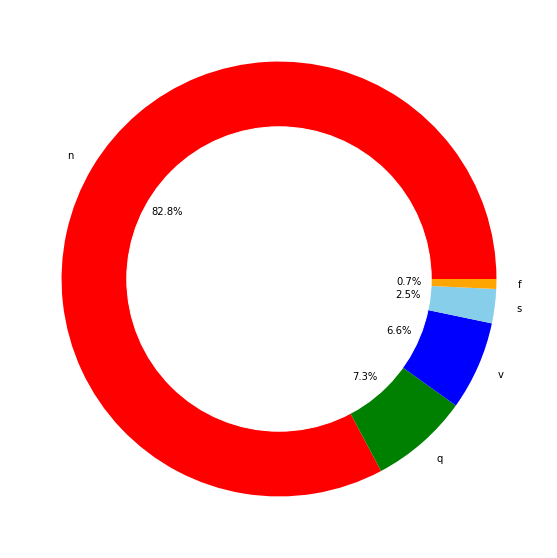

In [26]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [27]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [28]:
equilibre=train_df[187].value_counts()
print(equilibre)

4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64


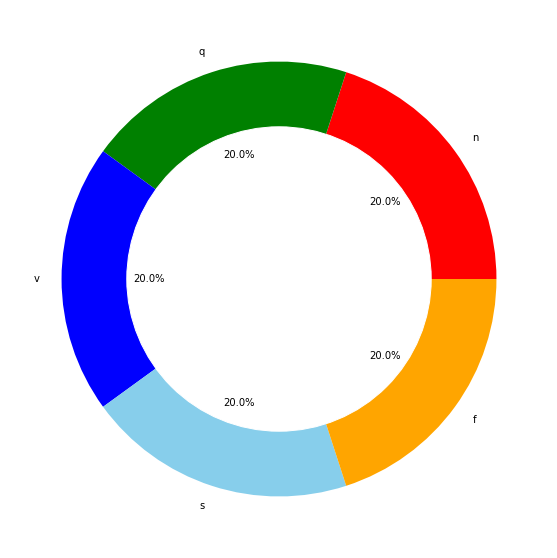

In [29]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [30]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [31]:
c

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
56968,1.000000,0.868035,0.475073,0.005865,0.137830,0.269795,0.334311,0.354839,0.372434,0.384164,0.398827,0.413490,0.436950,0.454545,0.466276,0.513196,0.554252,0.571847,0.598240,0.624633,0.639296,0.639296,0.633431,0.607038,0.568915,0.542522,0.492669,0.457478,0.413490,0.401760,0.390029,0.375367,0.366569,0.357771,0.369501,0.360704,0.360704,0.375367,0.398827,0.401760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73796,1.000000,0.821138,0.032520,0.000000,0.178862,0.192412,0.168022,0.140921,0.113821,0.105691,0.105691,0.100271,0.138211,0.143631,0.140921,0.157182,0.162602,0.159892,0.154472,0.146341,0.154472,0.159892,0.154472,0.146341,0.181572,0.216802,0.230352,0.238482,0.249322,0.214092,0.173442,0.159892,0.149051,0.138211,0.138211,0.119241,0.135501,0.146341,0.119241,0.140921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
75812,0.011001,0.000000,0.066007,0.144114,0.215622,0.309131,0.389439,0.482948,0.587459,0.628163,0.651265,0.640264,0.630363,0.643564,0.660066,0.655666,0.667767,0.644664,0.661166,0.691969,0.705171,0.710671,0.724972,0.741474,0.727173,0.720572,0.726073,0.710671,0.691969,0.666667,0.639164,0.617162,0.595160,0.579758,0.553355,0.528053,0.526953,0.536854,0.536854,0.518152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
81002,1.000000,0.914089,0.671821,0.353952,0.091065,0.000000,0.005155,0.085911,0.152921,0.176976,0.166667,0.166667,0.170103,0.166667,0.156357,0.154639,0.147766,0.132302,0.116838,0.109966,0.104811,0.096220,0.085911,0.085911,0.103093,0.115120,0.128866,0.164948,0.204467,0.240550,0.280069,0.309278,0.336770,0.348797,0.347079,0.341924,0.329897,0.317869,0.302406,0.290378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
86853,0.926103,0.887962,0.820024,0.754470,0.663886,0.564958,0.435042,0.295590,0.195471,0.144219,0.123957,0.050060,0.003576,0.000000,0.106079,0.239571,0.299166,0.343266,0.367104,0.394517,0.463647,0.513707,0.566150,0.636472,0.687723,0.696067,0.698451,0.716329,0.709178,0.709178,0.703218,0.702026,0.702026,0.707986,0.717521,0.715137,0.728248,0.741359,0.744934,0.747318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


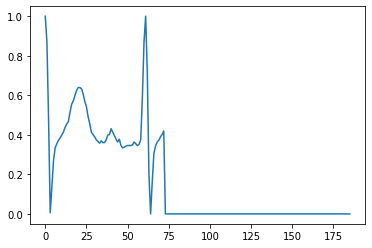

In [32]:
 plt.plot(c.iloc[0,:186])

In [33]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


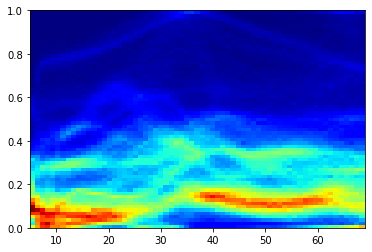

In [34]:
plot_hist(0,70,5,65)

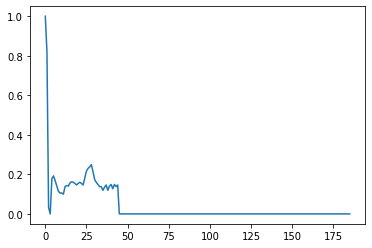

In [35]:
plt.plot(c.iloc[1,:186])

900000
900000


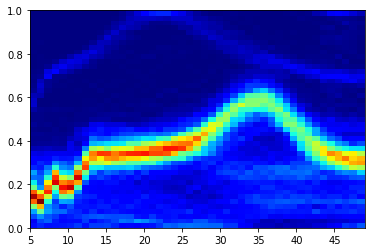

In [36]:
plot_hist(1,50,5,45)

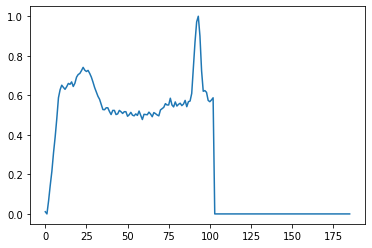

In [37]:
plt.plot(c.iloc[2,:186])

900000
900000


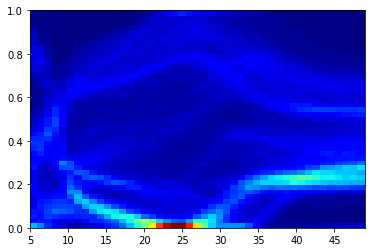

In [38]:
plot_hist(2,50,5,45)

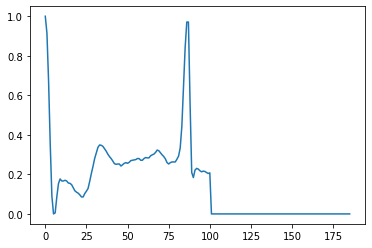

In [39]:
plt.plot(c.iloc[3,:186])

900000
900000


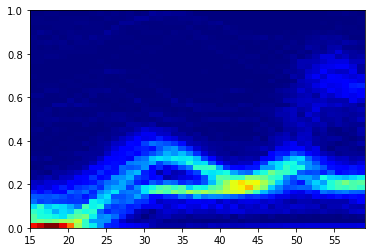

In [40]:
plot_hist(3,60,15,45)

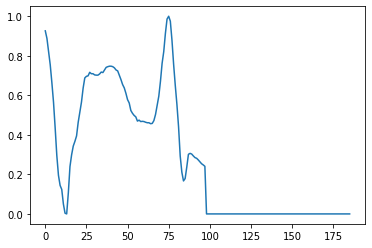

In [41]:
plt.plot(c.iloc[4,:186])

700000
700000


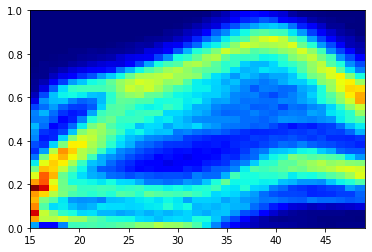

In [42]:
plot_hist(4,50,15,35)

In [43]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

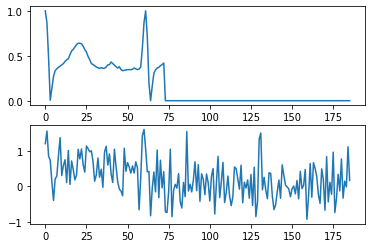

In [44]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [45]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [46]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [47]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [48]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [49]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/40
3125/3125 [==============================] - 62s 5ms/step - loss: 0.9973 - accuracy: 0.6086 - val_loss: 0.7381 - val_accuracy: 0.7781
Epoch 2/40
3125/3125 [==============================] - 16s 5ms/step - loss: 0.7981 - accuracy: 0.6943 - val_loss: 1.0454 - val_accuracy: 0.5657
Epoch 3/40
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7602 - accuracy: 0.7115 - val_loss: 0.8535 - val_accuracy: 0.7647
Epoch 4/40
3125/3125 [==============================] - 16s 5ms/step - loss: 0.7292 - accuracy: 0.7222 - val_loss: 0.9832 - val_accuracy: 0.7172
Epoch 5/40
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7001 - accuracy: 0.7351 - val_loss: 0.9622 - val_accuracy: 0.6312
Epoch 6/40
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6755 - accuracy: 0.7440 - val_loss: 0.9978 - val_accuracy: 0.7918
Epoch 7/40
3125/3125 [==============================] - 14s 5ms/step - loss: 0.6436 - accuracy: 0.7554 - val_loss: 1.0066 - val_ac

Accuracy: 77.81%


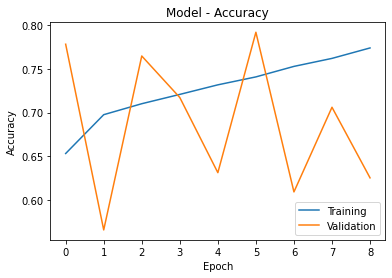

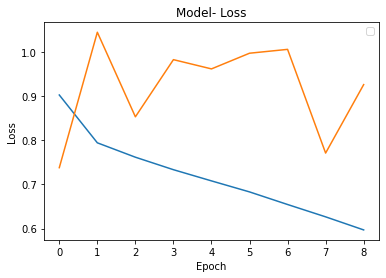

In [50]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Normalized confusion matrix


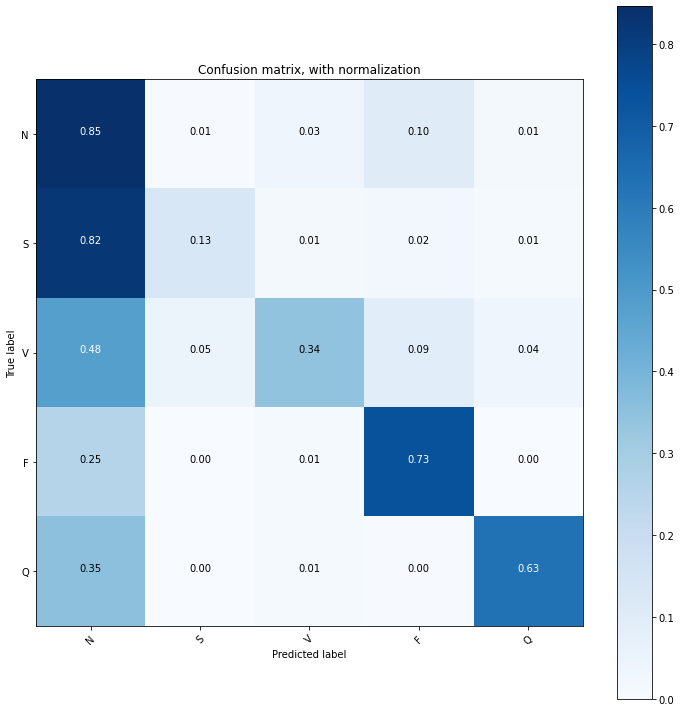

In [51]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()